In [2]:
import mlrose_hiive as mh

In [12]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_22120/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [1]:
import pandas as pd

In [5]:
# # Flip Flop
problem_ffp = mh.FlipFlopGenerator().generate(seed=0, size=1000)
#state = problem_ffp.get_state()

In [6]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[20, 50, 100, 150],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [7]:
df_run_curves_ffp.shape

(15936, 7)

In [10]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003819,516.0,0.0,20,0.1,2048
1,1,0.020528,540.0,2.0,20,0.1,2048
2,2,0.049029,545.0,4.0,20,0.1,2048
3,3,0.069548,547.0,6.0,20,0.1,2048
4,4,0.076954,547.0,7.0,20,0.1,2048


In [11]:
df_run_curves_ffp['Fitness'].max()

835.0

In [12]:
# need to check Time and FEvals

In [13]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [14]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [15]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
15900,2013,16.479797,835.0,2140.0,150,0.08,2048
15901,2014,16.491616,835.0,2141.0,150,0.08,2048
15902,2015,16.504464,835.0,2142.0,150,0.08,2048
15903,2016,16.513538,835.0,2143.0,150,0.08,2048
15904,2017,16.524818,835.0,2144.0,150,0.08,2048
15905,2018,16.534682,835.0,2145.0,150,0.08,2048
15906,2019,16.542077,835.0,2146.0,150,0.08,2048
15907,2020,16.553087,835.0,2147.0,150,0.08,2048
15908,2021,16.562417,835.0,2148.0,150,0.08,2048
15909,2022,16.569160,835.0,2149.0,150,0.08,2048


In [16]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,150,0.08,2140.0,2030.5,16.479797


In [72]:
# only pop=150 and mute=0.08 produced the highest fitness value 835

In [17]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003819,516.0,0.0,20,0.1,2048
1,1,0.020528,540.0,2.0,20,0.1,2048
2,2,0.049029,545.0,4.0,20,0.1,2048
3,3,0.069548,547.0,6.0,20,0.1,2048
4,4,0.076954,547.0,7.0,20,0.1,2048


In [18]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [19]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[150], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [20]:
df_iter_curves_ffp.shape

(20089, 7)

In [51]:
#df_iter_curves_ffp.to_csv('df_iter_curves_ffp_ga_1000.csv', index = False)

In [3]:
#df_iter_curves_ffp = pd.read_csv('../../csv-files/df_iter_curves_ffp_ga_1000.csv')

In [21]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.016851,516.0,0.0,150,0.08,2048
1,1,0.106617,546.0,2.0,150,0.08,2048
2,2,0.216431,563.0,4.0,150,0.08,2048
3,3,0.333404,566.0,6.0,150,0.08,2048
4,4,0.476334,566.0,7.0,150,0.08,2048


In [22]:
df_iter_curves_ffp.Iteration.max()

2048

In [23]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [24]:
df_fitness_iter_ffp.shape

(2049, 3)

In [25]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,496.0,233.777778
1,1,544.7,88.011111
2,2,548.7,94.233333
3,3,552.6,102.933333
4,4,554.2,73.288889


In [26]:
df_iter_curves_ffp.Fitness.max()

843.0

In [27]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

1854    1854
1855    1855
1856    1856
1857    1857
1858    1858
        ... 
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, Length: 195, dtype: int64

In [28]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [29]:
df_fitness_iter_ffp.avg_fitness.max()

835.4285714285714

In [53]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == 500].avg_fitness

500    785.1
Name: avg_fitness, dtype: float64

In [54]:
835 - 785

50

In [55]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == 0].avg_fitness

0    496.0
Name: avg_fitness, dtype: float64

In [56]:
785 - 496

289

In [30]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [52]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,496.0,233.777778,15.289793
1,1,544.7,88.011111,9.381424
2,2,548.7,94.233333,9.707386
3,3,552.6,102.933333,10.145607
4,4,554.2,73.288889,8.560893


Text(0, 0.5, 'Fitness')

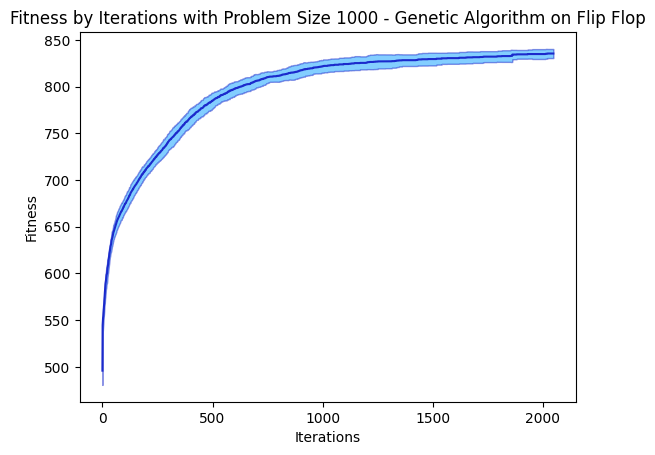

In [32]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 1000 - Genetic Algorithm on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [57]:
df_fitness_iter_ffp.stddev_fitness.max()

15.289793254906288

In [66]:
df_fitness_iter_ffp.stddev_fitness.min()

4.6666666666666625

In [58]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()]

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,496.0,233.777778,15.289793


In [65]:
df_fitness_iter_ffp[(df_fitness_iter_ffp.Iteration == 50) | (df_fitness_iter_ffp.Iteration == 100) | (df_fitness_iter_ffp.Iteration ==500) \
    | (df_fitness_iter_ffp.Iteration == 800) | (df_fitness_iter_ffp.Iteration == 1000)\
    | (df_fitness_iter_ffp.Iteration == 2000)]

,Iteration,avg_fitness,var_fitness,stddev_fitness
50,50,644.000000,63.555556,7.972174
100,100,673.100000,78.544444,8.862530
500,500,785.100000,71.211111,8.438668
800,800,811.500000,39.833333,6.311365
1000,1000,821.600000,45.155556,6.719788
2000,2000,834.857143,27.809524,5.273474


In [33]:
# Fevals - iteration

In [4]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [5]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [36]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,2.0,0.000000
2,2,3.6,0.266667
3,3,5.2,0.400000
4,4,6.5,0.722222


In [37]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [38]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 8.83427667918797)

In [39]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,2.0,0.000000,0.000000
2,2,3.6,0.266667,0.516398
3,3,5.2,0.400000,0.632456
4,4,6.5,0.722222,0.849837


In [67]:
df_FEvals_iter_ffp.avg_FEvals.max()

2174.285714285714

In [6]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration']==988].avg_FEvals

988    1106.1
Name: avg_FEvals, dtype: float64

In [7]:
gab_1000_fevals = pd.read_csv('../../csv-files/df_FEvals_iter_1000_gabf981.csv')

In [70]:
gab_1000_fevals.shape

(982, 5)

In [8]:
gab_1000_fevals.head()

,Unnamed: 0,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0,0.0,0.000000,0.000000
1,1,1,2.0,0.000000,0.000000
2,2,2,3.5,0.277778,0.527046
3,3,3,5.1,0.766667,0.875595
4,4,4,6.4,1.155556,1.074968


In [9]:
compare_ga_gab_fevals = df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration']<989]['avg_FEvals']\
                        - gab_1000_fevals['avg_FEvals']

In [10]:
compare_ga_gab_fevals[compare_ga_gab_fevals >= 0]

0     0.0
1     0.0
2     0.1
3     0.1
4     0.1
5     0.1
6     0.2
7     0.1
8     0.2
9     0.7
10    0.8
11    1.1
12    1.0
13    0.8
14    1.1
15    0.8
16    0.8
17    0.6
18    0.7
19    0.6
20    0.4
21    0.1
22    0.4
23    0.5
24    0.1
25    0.0
27    0.0
28    0.1
29    0.1
30    0.3
31    0.4
32    0.5
33    0.5
34    0.5
35    0.3
36    0.3
37    0.2
38    0.3
39    0.1
40    0.1
42    0.2
43    0.3
44    0.0
Name: avg_FEvals, dtype: float64

In [25]:
compare_ga_gab_fevals.max()

1.1000000000000014

In [13]:
np.mean(compare_ga_gab_fevals)

-103.27601914712632

In [14]:
(988 - 43) / 988

0.9564777327935222

Text(0, 0.5, 'FEvals')

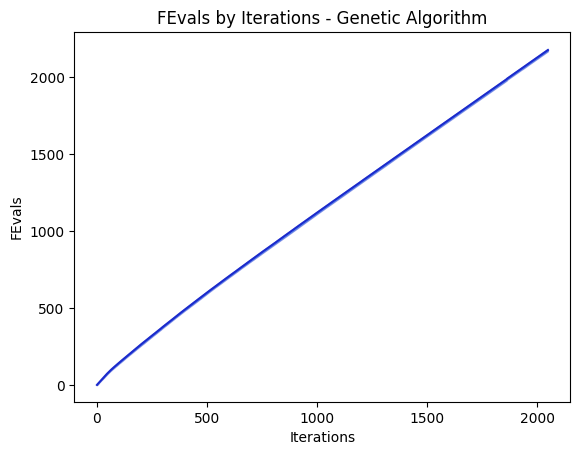

In [40]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [41]:
# fitness - wall clock time

In [16]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [43]:
df_time_iter_ffp.shape

(2049, 3)

In [44]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.008424,0.000016
1,1,0.071869,0.003590
2,2,0.131809,0.009766
3,3,0.189478,0.013902
4,4,0.239681,0.021806


In [45]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [46]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.008424,0.000016,0.004057
1,1,0.071869,0.003590,0.059918
2,2,0.131809,0.009766,0.098823
3,3,0.189478,0.013902,0.117907
4,4,0.239681,0.021806,0.147669


Text(0, 0.5, 'Time')

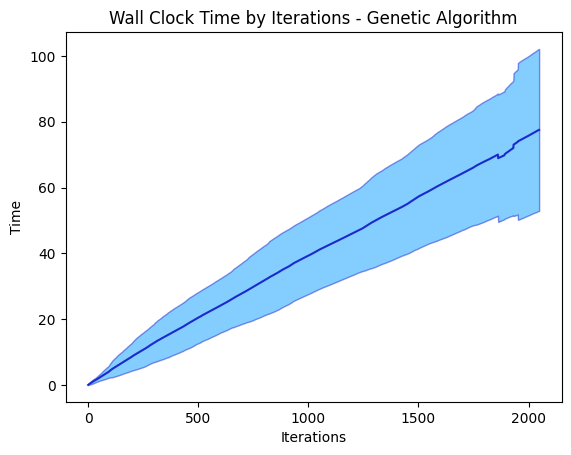

In [48]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [49]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64

In [81]:
df_time_iter_ffp.stddev_time.max()

24.6060753870709

In [82]:
df_time_iter_ffp.avg_time.max()

77.52883099228244

In [17]:
df_time_iter_ffp[df_time_iter_ffp['Iteration']<=988].avg_time.max()

38.89017108379922

In [26]:
df_time_iter_1000_gab988 = pd.read_csv('../../csv-files/df_time_iter_1000_gabf981.csv')

In [27]:
comp_time = df_time_iter_1000_gab988['avg_time'] - df_time_iter_ffp[df_time_iter_ffp['Iteration'] <= 988].avg_time

In [30]:
comp_time.max()

-0.0018006400030572307

In [28]:
comp_time[comp_time < 0].min(), comp_time[comp_time < 0].max(), len(comp_time[comp_time < 0])

(-9.780362987777337, -0.0018006400030572307, 989)

In [29]:
np.mean(comp_time)

-4.713023943861349

In [24]:
989/989

1.0